In [1]:
#General imports.
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
import os
import scipy

import uproot #https://indico.cern.ch/event/686641/contributions/2894906/attachments/1606247/2548596/pivarski-uproot.pdf
from awkward import JaggedArray
from root_pandas import read_root # https://github.com/scikit-hep/root_pandas

import warnings
warnings.filterwarnings('once')

%matplotlib inline

Welcome to JupyROOT 6.12/06


In [2]:
f = r.TFile("./data/gm2offline_ana_100files_fullTrees.root")
twest = f.Get("farline").Get("eventTree")
teast = f.Get("farline").Get("eastTree")
tcomp = f.Get("farline").Get("evwTree")
terr = f.Get("farline").Get("evwNoPartnerTree")

tcomp2 = f.Get("farline").Get("wveTree")
terr2 = f.Get("farline").Get("wveNoPartnerTree")

In [3]:
f.cd("farline")
f.ls()

TFile**		./data/gm2offline_ana_100files_fullTrees.root	
 TFile*		./data/gm2offline_ana_100files_fullTrees.root	
  TDirectoryFile*		farline	farline (ReconComparisonEastVsWest) folder
   OBJ: TTree	eventTree	eventTree : 0 at: 0x7fffdf7d0f10
   OBJ: TTree	eastTree	eastTree : 0 at: 0x7fffdf7e6580
   OBJ: TTree	evwTree	evwTree : 0 at: 0x7fffdf7c6d20
   OBJ: TTree	evwNoPartnerTree	evwNoPartnerTree : 0 at: 0x7fffd9f85420
   OBJ: TTree	wveTree	wveTree : 0 at: 0x7fffdf5c1a60
   OBJ: TTree	wveNoPartnerTree	wveNoPartnerTree : 0 at: 0x7fffdf7dede0
   KEY: TDirectoryFile	evw_calo1;1	evw_calo1
   KEY: TDirectoryFile	evw_calo2;1	evw_calo2
   KEY: TDirectoryFile	evw_calo3;1	evw_calo3
   KEY: TDirectoryFile	evw_calo4;1	evw_calo4
   KEY: TDirectoryFile	evw_calo5;1	evw_calo5
   KEY: TDirectoryFile	evw_calo6;1	evw_calo6
   KEY: TDirectoryFile	evw_calo7;1	evw_calo7
   KEY: TDirectoryFile	evw_calo8;1	evw_calo8
   KEY: TDirectoryFile	evw_calo9;1	evw_calo9
   KEY: TDirectoryFile	evw_calo10;1	evw_calo10
   KEY

In [4]:
tcomp.Print()

******************************************************************************
*Tree    :evwTree   : evwTree                                                *
*Entries :  6138641 : Total =      1255108540 bytes  File  Size =  592413426 *
*        :          : Tree compression factor =   2.12                       *
******************************************************************************
*Br    0 :runNum    : runNum/i                                               *
*Entries :  6138641 : Total  Size=   24560441 bytes  File Size  =     125983 *
*Baskets :       58 : Basket Size=    3702784 bytes  Compression= 194.94     *
*............................................................................*
*Br    1 :subRunNum : subRunNum/i                                            *
*Entries :  6138641 : Total  Size=   24560627 bytes  File Size  =     126161 *
*Baskets :       58 : Basket Size=    3703296 bytes  Compression= 194.67     *
*...................................................

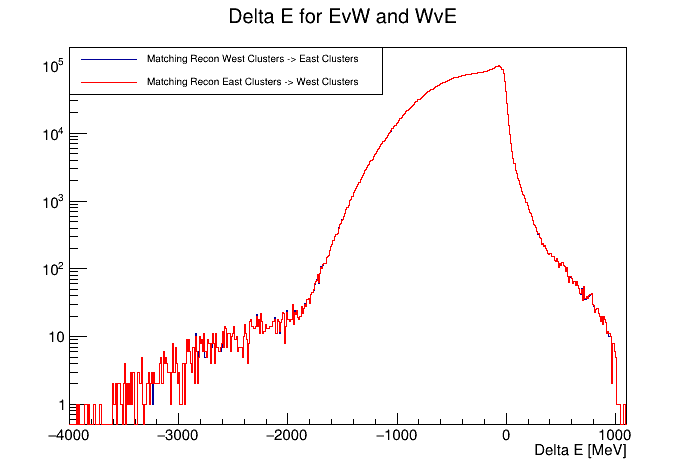

In [5]:
hDeltaE_WvE = f.Get("farline").Get("wveDeltaXDeltaE").ProjectionY().Clone()
hDeltaE_EvW = f.Get("farline").Get("evwDeltaXDeltaE").ProjectionY().Clone()
c = r.TCanvas()
hDeltaE_WvE.Draw()
hDeltaE_WvE.SetTitle("Delta E for EvW and WvE")
hDeltaE_WvE.GetXaxis().SetRangeUser(-4000,1100)
hDeltaE_EvW.SetLineColor(2)
hDeltaE_EvW.Draw("SAME")

leg = r.TLegend(0.1,0.8,0.55,0.9)
leg.AddEntry(hDeltaE_WvE ,"Matching Recon West Clusters -> East Clusters", "l")
leg.AddEntry(hDeltaE_EvW ,"Matching Recon East Clusters -> West Clusters", "l")
leg.Draw()

c.SetLogy()
c.Draw()

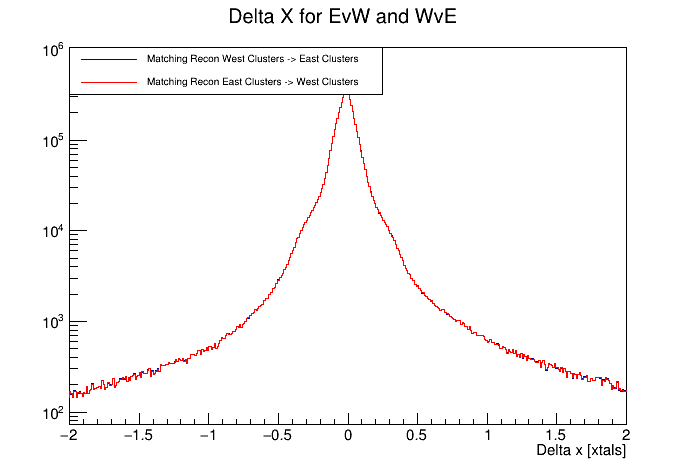

In [6]:
hDeltaX_WvE = f.Get("farline").Get("wveDeltaXDeltaE").ProjectionX().Clone()
hDeltaX_EvW = f.Get("farline").Get("evwDeltaXDeltaE").ProjectionX().Clone()
c = r.TCanvas()
hDeltaX_WvE.Draw()
hDeltaX_WvE.SetTitle("Delta X for EvW and WvE")
hDeltaX_WvE.GetXaxis().SetRangeUser(-2,2)
hDeltaX_EvW.SetLineColor(2)
hDeltaX_EvW.Draw("SAME")

leg = r.TLegend(0.1,0.8,0.55,0.9)
leg.AddEntry(hDeltaX_WvE ,"Matching Recon West Clusters -> East Clusters", "l")
leg.AddEntry(hDeltaX_EvW ,"Matching Recon East Clusters -> West Clusters", "l")
leg.Draw()

c.SetLogy()
c.Draw()

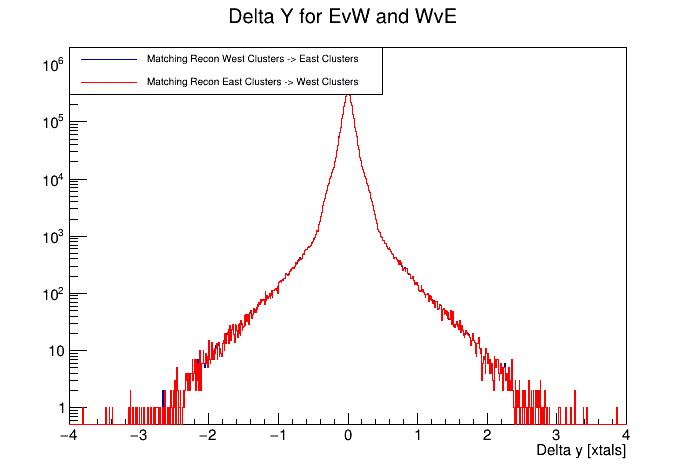

In [7]:
hDeltaY_WvE = f.Get("farline").Get("wveDeltaYDeltaE").ProjectionX().Clone()
hDeltaY_EvW = f.Get("farline").Get("evwDeltaYDeltaE").ProjectionX().Clone()
c = r.TCanvas()
hDeltaY_WvE.Draw()
hDeltaY_WvE.SetTitle("Delta Y for EvW and WvE")
hDeltaY_WvE.GetXaxis().SetRangeUser(-4,4)
hDeltaY_EvW.SetLineColor(2)
hDeltaY_EvW.Draw("SAME")

leg = r.TLegend(0.1,0.8,0.55,0.9)
leg.AddEntry(hDeltaY_WvE ,"Matching Recon West Clusters -> East Clusters", "l")
leg.AddEntry(hDeltaY_EvW ,"Matching Recon East Clusters -> West Clusters", "l")
leg.Draw()

c.SetLogy()
c.Draw()

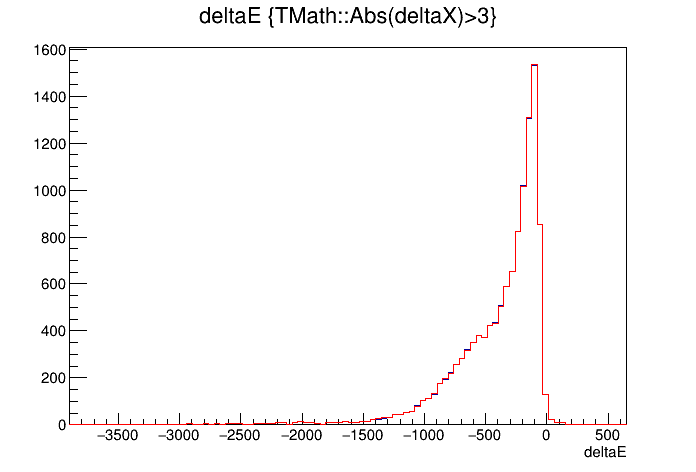

In [9]:
c = r.TCanvas()
tcomp.Draw("deltaE","TMath::Abs(deltaX)>3","")
tcomp2.SetLineColor(2)
tcomp2.Draw("deltaE","TMath::Abs(deltaX)>3","same")
c.Draw()

---

In [20]:
file = uproot.open("./data/gm2offline_ana_version10.root")
tcomp1 = file["farline/evwTree"]
tcomp2 = file["farline/wveTree"]
terr1 = file["farline/evwNoPartnerTree"]
terr2 = file["farline/wveNoPartnerTree"]

In [21]:
dfcomp1 = tcomp1.pandas.df()
dfcomp2 = tcomp2.pandas.df()

dferr1 = terr1.pandas.df()
dferr2 = terr2.pandas.df()

In [22]:
dfcomp1.describe()

,runNum,subRunNum,fill,island,caloNum,timeEast,timeWest,deltaT,first,second,first,second,deltaX,deltaY,energyEast,energyWest,deltaE,timeCorr
count,200047.0,200047.0,200047.000000,200047.000000,200047.000000,200047.000000,200047.000000,200047.000000,200047.000000,200047.000000,200047.000000,200047.000000,200047.000000,200047.000000,200047.000000,200047.000000,200047.000000,200047.000000
mean,16368.0,427.0,102.271561,109.034692,12.530145,75358.464627,75359.183027,-0.718400,3.891096,3.033633,3.891096,3.033633,-0.020597,0.000304,777.612980,1195.920038,-418.307058,-0.715880
std,0.0,0.0,58.161625,38.553219,6.908966,51258.339892,51258.340264,0.839040,2.628376,1.285031,2.628376,1.285031,0.528747,0.147832,482.471176,714.833118,314.393033,0.837270
min,16368.0,427.0,2.000000,0.000000,1.000000,24000.379959,24000.621243,-3.033375,0.500000,0.500000,0.500000,0.500000,-6.978796,-3.089747,39.759016,28.933722,-3921.207820,-2.533535
25%,16368.0,427.0,52.000000,84.000000,7.000000,38663.228337,38664.011294,-0.946616,1.500000,2.099850,1.500000,2.099850,-0.067121,-0.039853,357.134504,574.313595,-612.361169,-0.955265
50%,16368.0,427.0,103.000000,111.000000,13.000000,59567.517418,59567.938128,-0.529171,3.565945,3.067379,3.565945,3.067379,-0.009878,0.000000,731.084919,1146.874391,-367.917731,-0.464979
75%,16368.0,427.0,154.000000,137.000000,18.000000,95456.845178,95458.088551,-0.141617,6.054406,4.012033,6.054406,4.012033,0.037058,0.040345,1133.852245,1746.400802,-166.875677,-0.100543
max,16368.0,427.0,201.000000,226.000000,24.000000,534897.648141,534900.050249,1.029536,8.500000,5.500000,8.500000,5.500000,6.014606,3.684061,3560.793926,5170.178012,1042.723708,0.543326


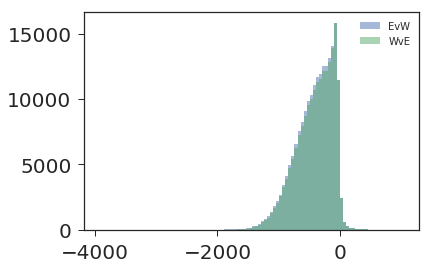

In [27]:
plt.hist(dfcomp1['deltaE'],bins=100,label='EvW',alpha=0.5)
plt.hist(dfcomp2['deltaE'],bins=100,label='WvE',alpha=0.5)
plt.legend()
plt.show()